# ANÁLISIS EXPLORATORIO DE DATOS

Este notebook contiene el reporte preliminar de datos que serán utilizados durante el proyecto. 



In [26]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt


## Carga de datos

In [2]:
df = pd.read_excel('data/catalogo_streaming.xlsx')
df.head()

,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,runtime,genres,director,year_range,url
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,142,"Drama, Crimen",Frank Darabont,1900_2002,https://play.max.com/movie/9b4dacba-2f80-4272-...
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,"Misterio & Suspense, Drama, Acción & Aventura,...",Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...
2,Origen,Max,MOVIE,2570263.0,8.8,139.644,8.369,148,"Ciencia ficción, Acción & Aventura, Misterio &...",Christopher Nolan,2003_2010,https://play.max.com/movie/14552c93-d318-4563-...
3,El club de la lucha,Disney Plus,MOVIE,2345071.0,8.8,108.297,8.400,139,Drama,David Fincher,1998_2004,https://disneyplus.bn5x.net/c/1206980/705874/9...
4,El club de la lucha,Netflix,MOVIE,2345071.0,8.8,108.297,8.400,139,Drama,David Fincher,1995_2005,http://www.netflix.com/title/26004747


In [3]:
print('Cantidad de registros :', df.__len__())

Cantidad de registros : 19817


## Funciones utiles

In [4]:
def get_value_counts(dataframe: pd.DataFrame, column_name: str) -> pd.Series:
    """
    :param dataframe: The pandas DataFrame containing the data.
    :param column_name: The name of the column for which to get the value counts.
    :return: A pandas Series object containing the counts of each unique value in the specified column.
    """
    return dataframe[column_name].value_counts()


def count_values_in_column(dataframe: pd.DataFrame, column_name: str) -> pd.Series:
    """
    :param dataframe: A pandas DataFrame containing the data.
    :param column_name: The name of the column for which the values need to be counted.
    :return: A pandas Series object containing the count of each unique value in the specified column.
    """
    return get_value_counts(dataframe, column_name)


def filter_values_greater_than_one(dataframe : pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    Filters the values in the specified column of the given dataframe,
    keeping only the ones that occur more than once.

    :param dataframe: The dataframe containing the data.
    :type dataframe: pandas.DataFrame
    :param column_name: The name of the column to filter.
    :type column_name: str
    :return: A new dataframe with the filtered values.
    :rtype: pandas.DataFrame
    """
    value_counts = get_value_counts(dataframe, column_name)
    return value_counts[value_counts > 1]

## Descripciones iniciales

In [5]:
# Descripción de los datos
df.describe(include=object).T

,count,unique,top,freq
title,19817,18008,La niñera,5
platform,19817,6,Netflix,7109
type,19817,2,MOVIE,14060
genres,19665,4189,Documental,1277
director,14626,8812,Steven Spielberg,27
year_range,19817,27,2022,1697
url,19817,19062,http://www.netflix.com/title/81662957,2


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
imdbVotes,17854.0,48388.577630,148847.265886,5.000,462.00000,2849.5000,21969.75000,2906253.000
imdbScore,17927.0,6.399520,1.200258,1.100,5.70000,6.5000,7.30000,9.700
tmdbPopularity,19538.0,41.195589,131.031366,0.001,5.43325,14.4285,33.31250,4173.518
tmdbScore,18954.0,6.461363,1.254487,0.500,5.88950,6.6000,7.27375,10.000
runtime,19817.0,80.542867,37.092943,0.000,48.00000,89.0000,105.00000,263.000


### title

Vemos que la variable referente al título no es única para todos registros que existen.

In [7]:
# Títulos que aparecen más de una vez
filtered_value_counts = filter_values_greater_than_one(df, column_name='title')
filtered_value_counts

title
La niñera                         5
La momia                          5
Perdida                           5
La boda de mi mejor amigo         5
El Grinch                         5
                                 ..
Ruslan: Venganza de un asesino    2
Dexter                            2
El lobo de Wall Street            2
La tormenta perfecta              2
Locuras en la universidad         2
Name: count, Length: 1631, dtype: int64

<Axes: ylabel='Frequency'>

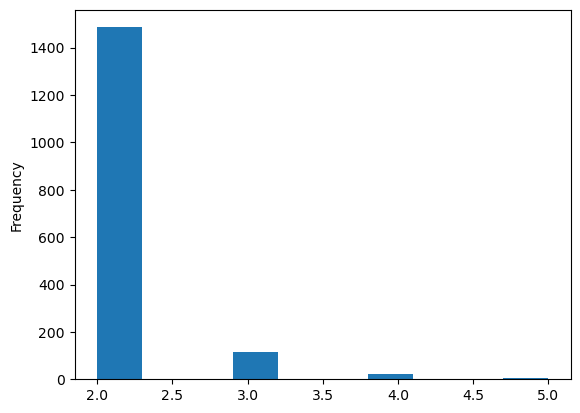

In [8]:
filtered_value_counts.plot(kind='hist')

In [9]:
# Mirando un registro en específico
df.loc[df['title'] == 'La momia']

,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,runtime,genres,director,year_range,url
413,La momia,Disney Plus,MOVIE,464416.0,7.1,87.481,6.929,124,"Acción & Aventura, Fantasía",Stephen Sommers,1998_2004,https://disneyplus.bn5x.net/c/1206980/705874/9...
414,La momia,Amazon Prime Video,MOVIE,464416.0,7.1,87.481,6.929,124,"Acción & Aventura, Fantasía",Stephen Sommers,1998_2004,https://app.primevideo.com/detail?gti=amzn1.dv...
1162,La momia,Max,MOVIE,207602.0,5.4,123.168,5.510,110,"Misterio & Suspense, Acción & Aventura, Terror...",Alex Kurtzman,2016_2019,https://play.max.com/movie/c4fe03b2-1c83-4750-...
1163,La momia,Netflix,MOVIE,207602.0,5.4,123.168,5.510,110,"Misterio & Suspense, Acción & Aventura, Terror...",Alex Kurtzman,2013_2017,http://www.netflix.com/title/80161352
1164,La momia,Amazon Prime Video,MOVIE,207602.0,5.4,123.168,5.510,110,"Misterio & Suspense, Acción & Aventura, Terror...",Alex Kurtzman,2017_2018,https://app.primevideo.com/detail?gti=amzn1.dv...


Se puede observar que en este registro en particular, podemos ver 2 casos:

- Se repite el valor para cada plataforma 
- Se repiten títulos para diferentes películas y se diferencian por año de lanzamiento

En este notebook no se tiene como objetivo hacer una limpieza de datos por lo que este caso solo se reporta y no sé interviene. 

### platform

Análisis de contenido en las plataformas

In [13]:
platform_counts = count_values_in_column(df, column_name='platform').to_frame(name='count') # se pasa a dataframe para manipularlo
platform_counts

,count
platform,
Netflix,7109
Amazon Prime Video,6436
Disney Plus,2980
Max,2585
Paramount Plus,475
Apple TV Plus,232


In [23]:
platform_counts['percentage'] = ( platform_counts['count'] / platform_counts['count'].sum() ) * 100 
platform_counts

,count,percentage
platform,,
Netflix,7109,35.873240
Amazon Prime Video,6436,32.477166
Disney Plus,2980,15.037594
Max,2585,13.044356
Paramount Plus,475,2.396932
Apple TV Plus,232,1.170712


array([<Axes: title={'center': 'count'}, xlabel='platform'>,
       <Axes: title={'center': 'percentage'}, xlabel='platform'>],
      dtype=object)

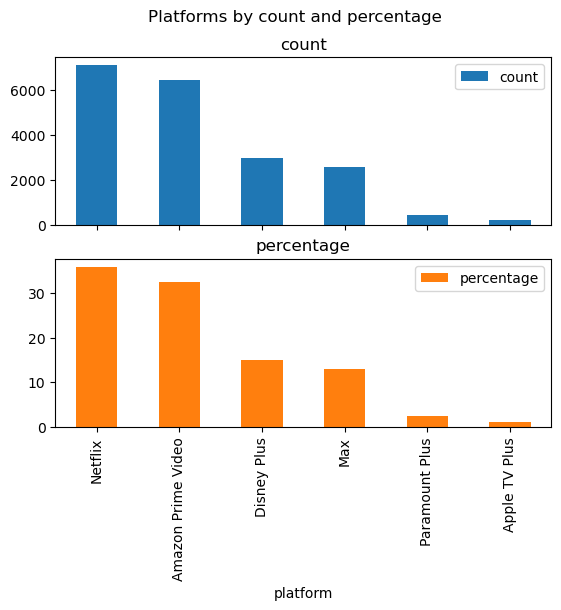

In [42]:
platform_counts.plot(kind='bar',subplots=True, title='Platforms by count and percentage')

Como podemos ver en general Netflix y Amazon representan más del 67% del contenido registrado. Esta variable puede a futuro ser analizada con la calidad de los contenidos que ambas plataformas contienen  

### type

In [45]:
type_counts = count_values_in_column(df, column_name='type')
type_counts

type
MOVIE    14060
SHOW      5757
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

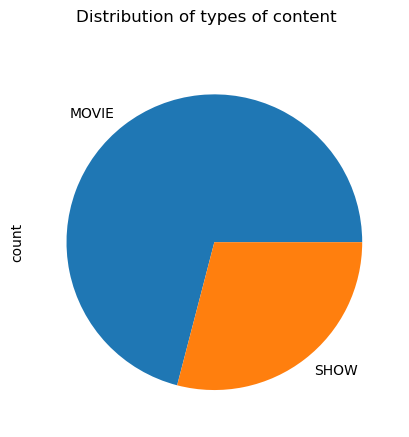

In [46]:
type_counts.plot(kind='pie', subplots=True, title='Distribution of types of content')

En el caso del tipo de contenido vemos que en su mayoría son películas. Esta variable a futuro se puede cruzar con otras para generar más valor